In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
cancer=datasets.load_breast_cancer()
df_cancer=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df_cancer['degree']=cancer.target # 1 malignant 0 benign
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,degree
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
input_cancer=cancer.data
output_cancer=df_cancer['degree']

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(input_cancer,output_cancer)

In [ ]:
from sklearn import svm
svc=svm.SVC(kernel = 'linear',C=0.1,probability=True)

In [ ]:
svc.fit(train_input,train_output)

SVC(C=0.1, kernel='linear', probability=True)

In [ ]:
svc.score(test_input,test_output)

0.965034965034965

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
confusion_matrix(test_output, svc.predict(test_input))

array([[56,  3],
       [ 2, 82]])

In [ ]:
TP=confusion_matrix(test_output, svc.predict(test_input))[0,0]
FN=confusion_matrix(test_output, svc.predict(test_input))[0,1]# : Type 2 error
FP=confusion_matrix(test_output, svc.predict(test_input))[1,0]# : Type 1 error
TN=confusion_matrix(test_output, svc.predict(test_input))[1,1]

In [ ]:
Sen=TP/(TP+FN) #Sensitivity, Recall
Spe=FN/(TN+FP) #Specificity
Pre=TP/(TP+FP) #Precision
Acc=(TP+TN)/(TP+TN+FP+FN) #Accuracy
Sen,Spe,Pre,Acc

(0.9491525423728814,
 0.03571428571428571,
 0.9655172413793104,
 0.965034965034965)

In [ ]:
pos_prob=svc.predict_proba(test_input)[:,1]

FPR,TPR,threshold=roc_curve(test_output,pos_prob)

Text(0.5, 0, 'False positive rate')

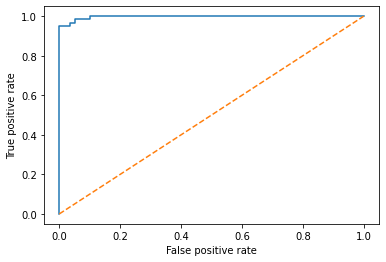

In [ ]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--')
plt.ylabel("True positive rate")
plt.xlabel("False positive rate")

In [ ]:
from sklearn.metrics import auc
auc(FPR,TPR)

0.9971751412429379